# Read the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data= pd.read_csv('/content/student_habits_performance2.csv')

In [ ]:
data.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
data.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [ ]:
data.shape

(1000, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

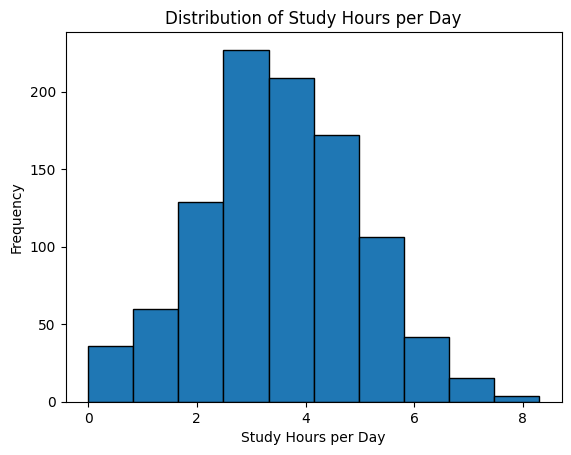

In [ ]:
plt.hist(data['study_hours_per_day'], bins=10, edgecolor='black')
plt.xlabel('Study Hours per Day')
plt.ylabel('Frequency')
plt.title('Distribution of Study Hours per Day')
plt.show()

# ANALYSIS




1.   AVG exam score
2.    Do students male and female students have different performance in exam

1.  Does the num of sleep hrs affect exam score
2.  Do students with high Diet quality and mental health have high exam score

1.   Does parental education level affect exam secore
2.  Does internt quality affect exam score

1.  Do students having part time job have high or low eam score


1.   Do study hrs + attendence have strong impact on exam score?














## 1.   AVG exam score

In [ ]:
data['exam_score'].mean()


np.float64(69.6015)

# 2.    Do students male and female students have different performance in exam?    Other

In [ ]:
new_data=data.groupby('gender')['exam_score'].mean()

In [ ]:
new_data

,exam_score
gender,
Female,69.741372
Male,69.368344
Other,70.647619


# Does the num of sleep hrs affect exam score

In [ ]:
new_data2=data.groupby('sleep_hours')['exam_score'].mean()

In [ ]:
new_data2

,exam_score
sleep_hours,
3.2,90.800000
3.3,62.000000
3.4,49.900000
3.5,62.250000
3.6,62.000000
...,...
9.5,73.266667
9.6,66.200000
9.7,80.450000


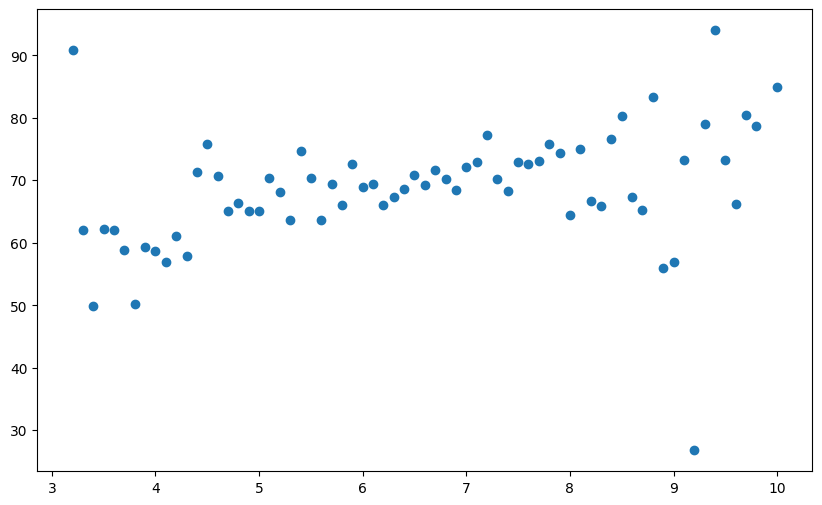

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(new_data2.index, new_data2.values)


In [ ]:
# How many hrs of sleep are linked to the highest exam score?
df= data[['sleep_hours', 'exam_score']]
row= df.iloc[df['exam_score'].idxmax()]

In [ ]:
row

,1
sleep_hours,4.6
exam_score,100.0


# 4- Do students with high Diet quality and mental health have high exam score    yes

In [ ]:
def diet_mind_link(row):
  avg_mh = data['mental_health_rating'].mean()
  if row['diet_quality'] == 'Good' and row['mental_health_rating'] > avg_mh:
      return 'Good_link'
  elif row['diet_quality'] == 'Fair' and row['mental_health_rating'] <= 1:
      return 'medium_link'
  else:
        return 'No_link'

In [ ]:
data['diet_mind_link'] = data.apply(diet_mind_link, axis=1)

In [ ]:
data['diet_mind_link'].value_counts()

,count
diet_mind_link,
No_link,746
Good_link,198
medium_link,56


In [ ]:
newframe= data.groupby('diet_mind_link')['exam_score'].mean()
newframe

,exam_score
diet_mind_link,
Good_link,75.103030
No_link,68.640349
medium_link,62.953571


# Does parental education level affect exam score? Bachelor

In [ ]:
New_data3=data.groupby('parental_education_level')['exam_score'].mean()

In [ ]:
New_data3

,exam_score
parental_education_level,
Bachelor,70.272571
High School,69.547194
Master,68.086826


#  Does internt quality affect exam score? Average

In [ ]:
new_data4=data.groupby('internet_quality')['exam_score'].mean()

In [ ]:
new_data4

,exam_score
internet_quality,
Average,70.643990
Good,68.647651
Poor,69.717284


# Do students having part time job have high or low eam score?  (students that don't work have high exam score)

In [ ]:
new_data4= data.groupby('part_time_job')['exam_score'].mean()

In [ ]:
new_data4

,exam_score
part_time_job,
No,69.836561
Yes,68.743256


# Do study hrs + attendence have strong impact on exam score?   yes

In [ ]:
def study_attendence_link(row):
  if row['study_hours_per_day'] > data['study_hours_per_day'].mean() and row['attendance_percentage'] > data['attendance_percentage'].mean():
    return 'Strong_link'
  elif row['study_hours_per_day'] > data['study_hours_per_day'].mean() and row['attendance_percentage'] < data['attendance_percentage'].mean():
    return 'Medium_link'
  else:
    return 'No_link'

In [ ]:
data['study_attendence_link']= data.apply(study_attendence_link, axis=1)

In [ ]:
data['study_attendence_link'].value_counts()


,count
study_attendence_link,
No_link,509
Strong_link,249
Medium_link,242


In [ ]:
new_data5= data.groupby('study_attendence_link')['exam_score'].mean()
new_data5

,exam_score
study_attendence_link,
Medium_link,79.092562
No_link,58.696464
Strong_link,82.669076


**DATA CLEANING**

# Missing data

In [ ]:
data.isnull().mean()

,0
student_id,0.000
age,0.000
gender,0.000
study_hours_per_day,0.000
social_media_hours,0.000
netflix_hours,0.000
part_time_job,0.000
attendance_percentage,0.000
sleep_hours,0.000
diet_quality,0.000


# Check dupes

In [ ]:
print(data.duplicated().any())

False


## Drop student-id

In [ ]:
data.drop('student_id', axis=1, inplace=True)

In [ ]:
data

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,diet_mind_link,study_attendence_link
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,No_link,No_link
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,Good_link,Strong_link
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,No_link,No_link
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,No_link,No_link
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,medium_link,Strong_link
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,No_link,No_link
996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,No_link,No_link
997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,Good_link,No_link
998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7,medium_link,Strong_link


# Split the data into features and label

In [ ]:
x= data.iloc[: , 0:14 ]
y= data.iloc[:, 14:15]

In [ ]:
y.head()

,exam_score
0,56.2
1,100.0
2,34.3
3,26.8
4,66.4


# GENDER REPLACING

In [ ]:
x['gender']=x['gender'].replace({'Female':0,'Male':1, 'Other': 2})

/tmp/ipython-input-1459822563.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['gender']=x['gender'].replace({'Female':0,'Male':1, 'Other': 2})


In [ ]:
x.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation
0,23,0,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes
1,20,0,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No
2,21,1,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No
3,23,0,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes
4,19,0,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No


#Part time job replacing

In [ ]:
x['part_time_job']=x['part_time_job'].replace({'No':0,'Yes':1})
x.head()

/tmp/ipython-input-115657605.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['part_time_job']=x['part_time_job'].replace({'No':0,'Yes':1})


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation
0,23,0,0.0,1.2,1.1,0,85.0,8.0,Fair,6,Master,Average,8,Yes
1,20,0,6.9,2.8,2.3,0,97.3,4.6,Good,6,High School,Average,8,No
2,21,1,1.4,3.1,1.3,0,94.8,8.0,Poor,1,High School,Poor,1,No
3,23,0,1.0,3.9,1.0,0,71.0,9.2,Poor,4,Master,Good,1,Yes
4,19,0,5.0,4.4,0.5,0,90.9,4.9,Fair,3,Master,Good,1,No


#diet quality replacing

In [ ]:
x['diet_quality']=x['diet_quality'].replace({'Poor':1,'Fair':2,'Good':3})
x.head()

/tmp/ipython-input-442101088.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['diet_quality']=x['diet_quality'].replace({'Poor':1,'Fair':2,'Good':3})


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation
0,23,0,0.0,1.2,1.1,0,85.0,8.0,2,6,Master,Average,8,Yes
1,20,0,6.9,2.8,2.3,0,97.3,4.6,3,6,High School,Average,8,No
2,21,1,1.4,3.1,1.3,0,94.8,8.0,1,1,High School,Poor,1,No
3,23,0,1.0,3.9,1.0,0,71.0,9.2,1,4,Master,Good,1,Yes
4,19,0,5.0,4.4,0.5,0,90.9,4.9,2,3,Master,Good,1,No


#parental_education_level	replacing

In [ ]:
x['parental_education_level'].unique()



array(['Master', 'High School', 'Bachelor', nan], dtype=object)

In [ ]:
# replace nan value
x['parental_education_level']=x['parental_education_level'].replace(np.nan , 'No_education')


In [ ]:
x['parental_education_level']=x['parental_education_level'].replace(['No_education', 'High School', 'Bachelor', 'Master'], [1, 2, 3, 4])

/tmp/ipython-input-2050106281.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['parental_education_level']=x['parental_education_level'].replace(['No_education', 'High School', 'Bachelor', 'Master'], [1, 2, 3, 4])


In [ ]:
x.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation
0,23,0,0.0,1.2,1.1,0,85.0,8.0,2,6,4,Average,8,Yes
1,20,0,6.9,2.8,2.3,0,97.3,4.6,3,6,2,Average,8,No
2,21,1,1.4,3.1,1.3,0,94.8,8.0,1,1,2,Poor,1,No
3,23,0,1.0,3.9,1.0,0,71.0,9.2,1,4,4,Good,1,Yes
4,19,0,5.0,4.4,0.5,0,90.9,4.9,2,3,4,Good,1,No


#internet_quality	replacing

In [ ]:
x['internet_quality'].unique()


array(['Average', 'Poor', 'Good'], dtype=object)

In [ ]:
x['internet_quality']=x['internet_quality'].replace(['Poor', 'Average', 'Good'], [1, 2, 3])
x.head()


/tmp/ipython-input-2198952032.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['internet_quality']=x['internet_quality'].replace(['Poor', 'Average', 'Good'], [1, 2, 3])


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation
0,23,0,0.0,1.2,1.1,0,85.0,8.0,2,6,4,2,8,Yes
1,20,0,6.9,2.8,2.3,0,97.3,4.6,3,6,2,2,8,No
2,21,1,1.4,3.1,1.3,0,94.8,8.0,1,1,2,1,1,No
3,23,0,1.0,3.9,1.0,0,71.0,9.2,1,4,4,3,1,Yes
4,19,0,5.0,4.4,0.5,0,90.9,4.9,2,3,4,3,1,No


# extracurricular_participation replacing


In [ ]:
x['extracurricular_participation'] = x['extracurricular_participation'].replace(['No', 'Yes'], [0, 1])
x.head()

/tmp/ipython-input-537537121.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['extracurricular_participation'] = x['extracurricular_participation'].replace(['No', 'Yes'], [0, 1])


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation
0,23,0,0.0,1.2,1.1,0,85.0,8.0,2,6,4,2,8,1
1,20,0,6.9,2.8,2.3,0,97.3,4.6,3,6,2,2,8,0
2,21,1,1.4,3.1,1.3,0,94.8,8.0,1,1,2,1,1,0
3,23,0,1.0,3.9,1.0,0,71.0,9.2,1,4,4,3,1,1
4,19,0,5.0,4.4,0.5,0,90.9,4.9,2,3,4,3,1,0


In [ ]:
x

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation
0,23,0,0.0,1.2,1.1,0,85.0,8.0,2,6,4,2,8,1
1,20,0,6.9,2.8,2.3,0,97.3,4.6,3,6,2,2,8,0
2,21,1,1.4,3.1,1.3,0,94.8,8.0,1,1,2,1,1,0
3,23,0,1.0,3.9,1.0,0,71.0,9.2,1,4,4,3,1,1
4,19,0,5.0,4.4,0.5,0,90.9,4.9,2,3,4,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,0,2.6,0.5,1.6,0,77.0,7.5,2,2,2,3,6,1
996,17,0,2.9,1.0,2.4,1,86.0,6.8,1,1,2,2,6,1
997,20,1,3.0,2.6,1.3,0,61.9,6.5,3,5,3,3,9,1
998,24,1,5.4,4.1,1.1,1,100.0,7.6,2,0,3,2,1,0


# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_x= MinMaxScaler(feature_range=(0,1))
scaler_y= MinMaxScaler(feature_range=(0,1))

In [ ]:
x= scaler_x.fit_transform(x)
y= scaler_y.fit_transform(y)

# Split the data into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [ ]:
len(x_train)

800

# AI

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.score(x_test, y_test)

0.900324480953525

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_pred= model.predict(x_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:' , r2_score(y_test, y_pred))

RMSE: 0.06607039132717867
R2: 0.900324480953525


# Improving the model

# Decision tree regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model= DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred= dt_model.predict(x_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:' , r2_score(y_test, y_pred))


RMSE: 0.11943453547298871
R2: 0.6742873715899458


# Random forest regressior

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model= RandomForestRegressor()
rf_model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_pred= rf_model.predict(x_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:' , r2_score(y_test, y_pred))


RMSE: 0.08117403988990873
R2: 0.8495441533684747
